In [1]:
# !wget https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/titanic_train.csv --output-document=./titanic_train.csv

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('./titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Расшифровка признаков:

    Номинативные (качественные):
- **Sex** - Пол пассажира
- **Embarked** - Порт посадки пассажира (S - Саутгемптон, C - Шербург и Q - Куинстаун)
- **Pclass*** - Класс билета (1 - высший, 2 - средний, 3 - низший)

    Числовые:
- **Age** - Возраст пассажира
- **Fare** - Стоимость билета
- **SibSp** - Число братьев, сестер или супругов на борту у пассажира
- **Parch** - Число родителей или детей, с которыми путешествовал каждый пассажир 
- **Ticket*** - Номер билета
- **Cabin*** - Номер кабины

    Текстовые:
- **Name** - Имя пассажира

    Таргет:
- **Survived** - Выжил ли пассажир (1 - да, 0 - нет)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 

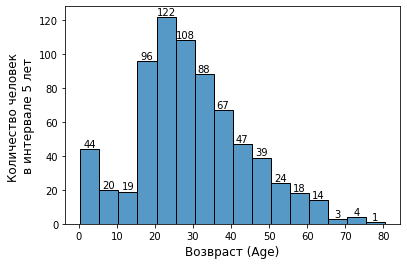

In [6]:
fig = plt.figure()

histogram = sns.histplot(data['Age'], binwidth = 5)

for i in histogram.containers:
    histogram.bar_label(i, size = 10)

histogram.set_xlabel("Возвраст (Age)", fontsize = 12)
histogram.set_ylabel("Количество человек \nв интервале 5 лет", fontsize = 12)

plt.show()

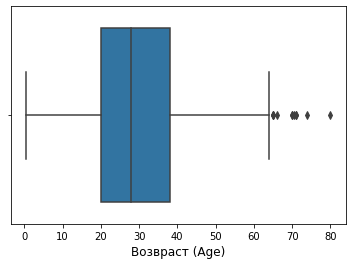

In [7]:
histogram = sns.boxplot(x=data['Age'])
histogram.set_xlabel("Возвраст (Age)", fontsize = 12)

plt.show()

In [8]:
data['Age'].median()

28.0

In [9]:
data['Age'].mean()

29.69911764705882

In [10]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [11]:
(data['Sex'] == 'female').sum()

314

In [12]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [26]:
data[data['Sex'] == 'female']['Pclass'].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [27]:
data[data['Sex'] == 'male']['Pclass'].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

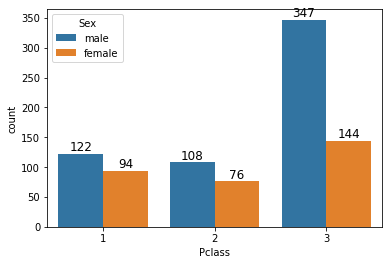

In [21]:
p = sns.countplot(data = data, x = 'Pclass', hue = 'Sex')

for i in p.containers:
    p.bar_label(i, fontsize=12)

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [31]:
data['Fare'].median()

14.4542

In [32]:
data['Fare'].std()

49.6934285971809

In [30]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [37]:
data[data['Age']<30]['Survived'].value_counts(normalize=True)*100

0    59.375
1    40.625
Name: Survived, dtype: float64

In [38]:
data[data['Age']>60]['Survived'].value_counts(normalize=True)*100

0    77.272727
1    22.727273
Name: Survived, dtype: float64

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

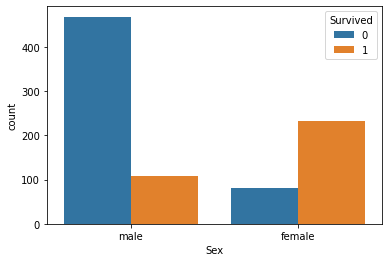

In [56]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

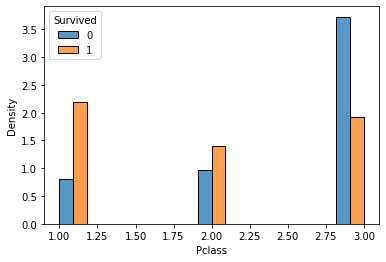

In [65]:
sns.histplot(data=data, x = 'Pclass', hue='Survived', multiple="dodge", 
             stat='density', common_norm=False)

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [81]:
pd.Series([i.split('. ')[1] for i in data[data['Sex'] == 'male']['Name'].tolist()]).value_counts()

John               9
James              7
William            6
Ivan               4
William John       4
                  ..
Masabumi           1
Penko              1
Theodore           1
Richard William    1
Karl Howell        1
Length: 504, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

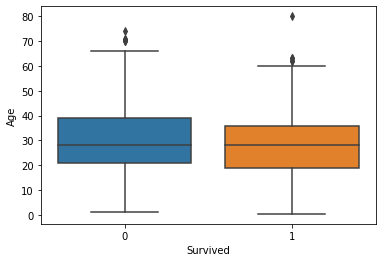

In [101]:
sns.boxplot(data=data, x='Survived', y='Age')
plt.show()

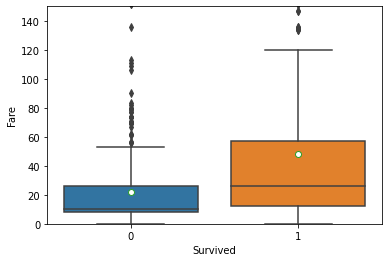

In [115]:
p = sns.boxplot(data=data, x='Survived', y='Fare', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white"})

p.set_ylim(0, 150)

plt.show()

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

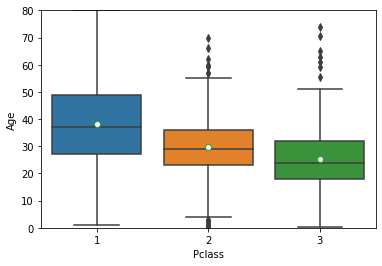

In [117]:
p = sns.boxplot(data=data, x='Pclass', y='Age', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white"})

p.set_ylim(0, 80)

plt.show()